# Démonstration - openfisca-tunisia
Retrouvez son code source ici : https://github.com/openfisca/openfisca-tunisia

## Chargement des bibliothèques et initialisation

In [1]:
import matplotlib.pyplot as plt  # For graphics
%matplotlib inline

from openfisca_tunisia.tunisia_taxbenefitsystem import TunisiaTaxBenefitSystem

In [2]:
tax_benefit_system = TunisiaTaxBenefitSystem()

## Evolution du barème de l'impôt sur le revenu

In [3]:
years = [2012, 2013, 2014, 2017, 2018]
salaire_de_base_max = 20000
simulation = tax_benefit_system.new_scenario().init_single_entity(
    period = 2014,
    axes = [
        [
            dict(
                # variable 'name' evolution between ['min', 'max'] in 'count' steps for 'period'
                count = 1000,
                name = 'salaire_de_base',
                min = 0,
                max = salaire_de_base_max,
                period = year,
                )
            for year in years
            ]
        ],
    parent1 = dict(age = 40),
    ).new_simulation()

In [4]:
salaire_imposable_by_year = dict(
    (year, simulation.calculate_add('salaire_imposable', period = year)) 
    for year in years
    )
irpp_by_year = dict(
    (year, simulation.calculate('irpp', period = year)) 
    for year in years
    )

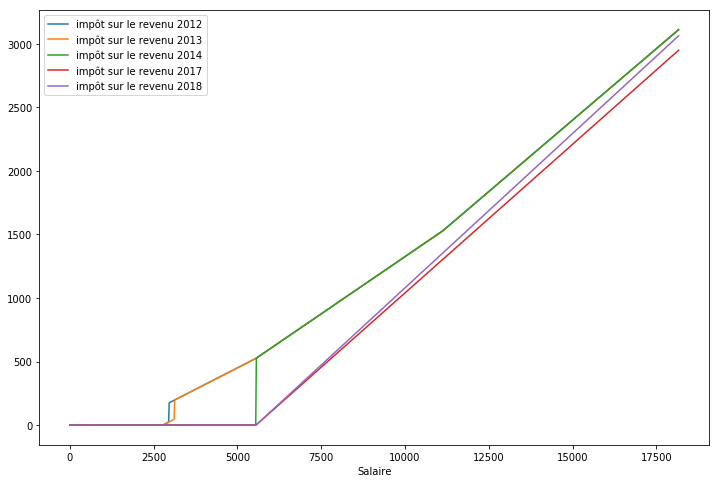

In [5]:
plt.figure(figsize=(12, 8))
salaire_imposable = salaire_imposable_by_year[2014]
for year in years:
    plt.plot(salaire_imposable, -irpp_by_year[year], label=u'impôt sur le revenu {}'.format(year))
    plt.xlabel(u'Salaire')
    plt.legend()


## Coût du travail et salaire net

In [6]:
salaire_de_base_max = 20000
simulations = [
    tax_benefit_system.new_scenario().init_single_entity(
        period = 2017,
        parent1 = dict(age = 40, regime_securite_sociale = regime_securite_sociale, salaire_de_base = 20000),
        ).new_simulation()
    for regime_securite_sociale in [0, 8]  # Salarié du privé ou fonctionnaire
    ]

In [7]:
variables = ['salaire_super_brut', 'salaire_de_base', 'salaire_imposable', 'salaire_net_a_payer']
for index, simulation in enumerate(simulations):
    print "Simulation " + str(index)
    for variable in variables:
        print(
            "{}: {}".format(
                variable,
                simulation.calculate_add(variable, period = 2017)
                )
            )

Simulation 0
salaire_super_brut: [23314.]
salaire_de_base: [20000.]
salaire_imposable: [18164.]
salaire_net_a_payer: [15213.622]
Simulation 1
salaire_super_brut: [23299.998]
salaire_de_base: [20000.]
salaire_imposable: [17574.]
salaire_net_a_payer: [14761.687]


In [8]:
# Add your code here :)